# Redes Neurais Convolucionais - Teoria II

## CNNs com Imagens:

### Operação de Multiplicação da Imagem x Kernel:

Para compreender a operação que é realizada, nesse [site](https://deeplizard.com/resource/pavq7noze2) há um simulador que ilustra a operação que está sendo feita. 


Mas imagine que temos a entrada, dada com por uma matriz $I \in \mathbb{R}^{3 \times 3}$ (Estamos desconsiderando outros possíveis canais da imagem). E temos um *kernel* que tem está em $\mathbb{R}^{2 \times 2}$. 

$$ I = 
\begin{pmatrix}
a & b & c \\
d & e & f \\
g & h & i 
\end{pmatrix}
kernel = 
\begin{pmatrix}
X & Y \\
Z & W 
\end{pmatrix}
$$


A multiplicação é basicamente:

$$ I \times kernel = OutPut
\newline
\begin{pmatrix}
a & b & c \\
d & e & f \\
g & h & i 
\end{pmatrix}
\times 
\begin{pmatrix}
X & Y \\
Z & W 
\end{pmatrix}
= 
\begin{pmatrix}
a * X + b * Y + d * Z + e * W & b * X + c * Y + e * Z + f * W \\
d * X + e * Y + g * Z + h * W & e * X + f * Y + h * Z + i * W
\end{pmatrix}
$$

A ideia é ir deslizando o kernel pela imagem multiplicando as posições correspondentes até passar o kernel por toda a imagem. 

O tamanho da saída é dado por:

$$
altura_{saida} = (altura_{entrada} - altura_{kernel} + 1)
\newline
largura_{saida} = (largura_{entrada} - largura_{kernel} + 1)
$$

In [24]:
import torch

def correlacao_cruzada(X, K):
    h, w = K.shape
    # Y vai ser a matriz de saída:
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))

    for i in range((Y.shape[0])):
        for j in range((Y.shape[1])):
            Y[i, j] = (X[i:i+h, j:j+w] * K).sum()
    return Y

In [25]:
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
K = torch.tensor([[0.0, 1.0], [2.0, 3.0]])
print(X, "\n")
print(K, "\n")

Y = correlacao_cruzada(X, K)
print(Y)

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]]) 

tensor([[0., 1.],
        [2., 3.]]) 

tensor([[19., 25.],
        [37., 43.]])


### Camadas de Convolução:

Uma camada convolucional tem como parâmtros um **kernel** e um **bias**. Na camada, o **kernel** passa por toda a entrada fazendo a operação descrita anteriormente e o **bias** é adicionado ao resultado. 

O tamanho do **kernel** é definido por nós e seus valores são iniciados geralmente aleatoriamente. 

In [26]:
from torch import nn
# nn é um módulo que significa 'neural networks' e dispões de uma
# série de ferramentas que facilitam a criação de redes neurais:
class Convolucao(nn.Module):
    def __init__(self, kernel_size):
        super(Convolucao, self).__init__()
        self.vetor_pesos = nn.Parameter(torch.rand(kernel_size))
        self.bias = nn.Parameter(torch.zeros(1))

    def forward(self, X):
        return correlacao_cruzada(X, self.vetor_pesos) + self.bias


### Preenchimento da Borda:

Como vemos, a multiplicação pelo *kernel* faz a imagem inicial perder a sua dimensão, sendo que o resultado da operação tem as seguintes dimensões:

$$
altura_{saida} = (altura_{entrada} - altura_{kernel} + 1)
\newline
largura_{saida} = (largura_{entrada} - largura_{kernel} + 1)
$$


Para contornar esse problema, uma possível solução é aumentar a dimensão da imagem inicial preenchendo esse aumento com valores nulos. Exemplo:

In [27]:
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
print(X, "\n")
X_pad = torch.zeros((X.shape[0] + 2, X.shape[1] + 2))
X_pad[1:-1, 1:-1] = X
print(X_pad, "\n")


tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]]) 

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 1., 2., 0.],
        [0., 3., 4., 5., 0.],
        [0., 6., 7., 8., 0.],
        [0., 0., 0., 0., 0.]]) 



### Stride ou Pulos nas Convoluções:

Em alguns modelos, a movimentação do *kernel* pode incluir alguns saltos, ou seja, ao invés de avançar 1 casa horizontalmente e depois 1 verticalmente, esse número por ser alterado:

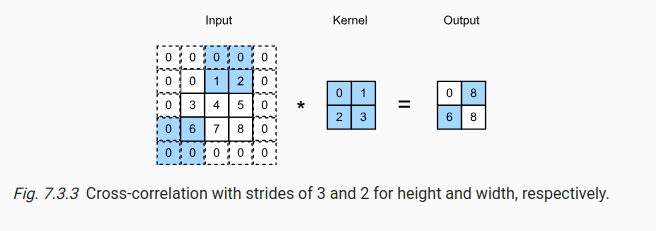

O tamanho do resultado é:
$$
altura_{saida} = (\lfloor (altura_{entrada} - altura_{kernel} + altura_{padding} + altura_{stride}) / altura_{stride} \rfloor )
\newline
largura_{saida} = (\lfloor (largura_{entrada} - largura_{kernel} + largura_{padding} + largura_{stride}) / largura_{stride} \rfloor )
$$



### Múltiplos Canais na Entrada:

Quando a imagem de entrada tem mais de um canal, imagine que ela tem mais de 2 dimensões apenas, precisamos levar isso em conta. 